In [1]:
# somewhat similar (but this written mostly before reading that)
#https://www.pluralsight.com/guides/deep-learning-model-add

In [2]:
!#pip install livelossplot --quiet

In [3]:
import tensorflow as tf
# tf.logging.set_verbosity(tf.logging.ERROR)
from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import numpy as np

Using TensorFlow backend.


In [4]:
trainingDataSize = 10000
epochs = 50

In [5]:
X = np.random.normal( loc=0, scale=100, size=[trainingDataSize,2] )


In [6]:
Y = X.sum(axis=1)
Ynoisy = Y + np.random.normal( scale = 3, size=trainingDataSize )

In [7]:
Y

array([ -12.54432098,  224.16943853,   22.20464617, ..., -159.16486629,
       -126.59579297,  -61.4149445 ])

In [8]:
Ynoisy

array([ -13.78394293,  223.15532272,   22.53156852, ..., -160.14511995,
       -124.37067028,  -64.63278431])

In [9]:
model = Sequential([
    #Flatten(), # input_shape=(2,)
    Dense(units=2, activation='relu'),
    Dense(units=20, activation='relu'),
	Dense(units=20, activation='relu'),
    Dense(units=1)
])
model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='mse',
              metrics=['mae'])

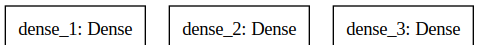

In [10]:
from IPython.display import SVG
from keras.utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [11]:
model.fit(X, Ynoisy, epochs=epochs, batch_size=100)


Epoch 1/50
10000/10000 [==============================] - 1s 66us/step - loss: 17074.2658 - mae: 104.3326
Epoch 2/50
10000/10000 [==============================] - 0s 15us/step - loss: 7600.3006 - mae: 65.8697
Epoch 3/50
10000/10000 [==============================] - 0s 15us/step - loss: 4239.5741 - mae: 45.0375
Epoch 4/50
10000/10000 [==============================] - 0s 15us/step - loss: 3564.7773 - mae: 41.1174
Epoch 5/50
10000/10000 [==============================] - 0s 15us/step - loss: 2929.9042 - mae: 37.1063
Epoch 6/50
10000/10000 [==============================] - 0s 14us/step - loss: 2286.5121 - mae: 32.4847
Epoch 7/50
10000/10000 [==============================] - 0s 14us/step - loss: 1618.8913 - mae: 26.9054
Epoch 8/50
10000/10000 [==============================] - 0s 14us/step - loss: 950.3636 - mae: 20.2383
Epoch 9/50
10000/10000 [==============================] - 0s 15us/step - loss: 409.1553 - mae: 13.0547
Epoch 10/50
10000/10000 [==============================] - 0s 15

In [12]:
model.predict(np.array([[101,102]]))

array([[203.48413]], dtype=float32)

In [13]:
model.predict(np.array([[95,100]]))

array([[195.47006]], dtype=float32)

In [14]:
model.predict(np.array([[1,2]]))

array([[3.237652]], dtype=float32)

In [15]:
model.predict(np.array([[2,2]]))

array([[4.2369356]], dtype=float32)

In [16]:
model.predict(np.array([[100,-250]]))

array([[-150.41685]], dtype=float32)

In [17]:
model.predict(np.array([[10000,-2500]]))

array([[7488.733]], dtype=float32)